<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Features" data-toc-modified-id="Features-0"><span class="toc-item-num">0&nbsp;&nbsp;</span>Features</a></span></li><li><span><a href="#All-you-need-to-import" data-toc-modified-id="All-you-need-to-import-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>All you need to import</a></span></li><li><span><a href="#Toy-examples" data-toc-modified-id="Toy-examples-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Toy examples</a></span><ul class="toc-item"><li><span><a href="#Example-1-(Moons,-2-classes)" data-toc-modified-id="Example-1-(Moons,-2-classes)-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Example 1 (Moons, 2 classes)</a></span></li><li><span><a href="#Example-2-(Sinusoidal,-2-classes)" data-toc-modified-id="Example-2-(Sinusoidal,-2-classes)-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Example 2 (Sinusoidal, 2 classes)</a></span></li><li><span><a href="#Example-3-(Gaussian,-4-classes)" data-toc-modified-id="Example-3-(Gaussian,-4-classes)-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Example 3 (Gaussian, 4 classes)</a></span></li><li><span><a href="#Reapeating-example-3-with-Relu-activation" data-toc-modified-id="Reapeating-example-3-with-Relu-activation-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Reapeating example 3 with Relu activation</a></span></li></ul></li><li><span><a href="#Real-world-Examples" data-toc-modified-id="Real-world-Examples-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Real world Examples</a></span><ul class="toc-item"><li><span><a href="#MNIST-Dataset-(10-classes)" data-toc-modified-id="MNIST-Dataset-(10-classes)-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>MNIST Dataset (10 classes)</a></span></li><li><span><a href="#Breast-Cancer-dataset-(2-classes)" data-toc-modified-id="Breast-Cancer-dataset-(2-classes)-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Breast Cancer dataset (2 classes)</a></span></li></ul></li></ul></div>

# DeepLearning from scratch

Here is implementation of Neural Network from scratch without using any libraries of ML Only numpy is used for NN and matplotlib for plotting the results.

**Objective**: Objective of this exercise is to understand what difference layers learn, how different activation functions affect the learning rate and importantly what different neurons learn with different activation functions.

##  Features
**Implementation includes following**

* **Optimization**: Gradient Decent, Momentum, RMSprop, Adam (RMS+ Momentum)

* **Regularization**: L2 Penalization, Dropouts

* **Activation Function**: Sigmoid, Tanh, Relu, LeakyRelu, Softmax  
* **Data set:**: Two class dataset (Gaussian, Linear, Moons, Spiral, Sinasodal) and Multiclass (Gaussian distribuated data upto 9 classes)

## All you need to import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

# DL library (code included)
from DeepNet import deepNet

# Toy Datasets (simulated) 
import DataSet as ds

# Other datasets
from sklearn import datasets

## Toy examples

### Example 1 (Moons, 2 classes)

**Data**

In [31]:
dtype = ['MOONS','GAUSSIANS','LINEAR','SINUSOIDAL','SPIRAL']

# Moons data
#Training: N=100 examples and no noise
Xr, yr,_ = ds.create_dataset(100, dtype[0],noise=0.0,varargin = 'PRESET');

#Testing: N=100 examples and 10% noise
Xs, ys,_ = ds.create_dataset(100, dtype[0],noise=0.1,varargin = 'PRESET');

print(Xr.shape, yr.shape,Xs.shape, ys.shape)
print('#Features: ',Xr.shape[0])
print('#Examples: ',Xr.shape[1])

(2, 100) (1, 100) (2, 100) (1, 100)
#Features:  2
#Examples:  100


**Neural Network**  :: Hidden Layers : [3,4]

In [32]:
NN = deepNet(X=Xr,y=yr,Xts=Xs, yts=ys, Net = [3,4],NetAf =['tanh'], alpha=0.01,
             miniBatchSize = 0.3,printCostAt =20,AdamOpt=True,lambd=0,keepProb =[1.0])

#Classes   :  2
#Features  :  2
#Examples  :  100
Network    :  [2, 3, 4, 1]
ActiFun    :  ['tanh', 'tanh', 'sig']
keepProb   :  [1.0, 1.0, 1.0, 1.0]


**Training and plotting**

In [33]:
%matplotlib notebook

<IPython.core.display.Javascript object>


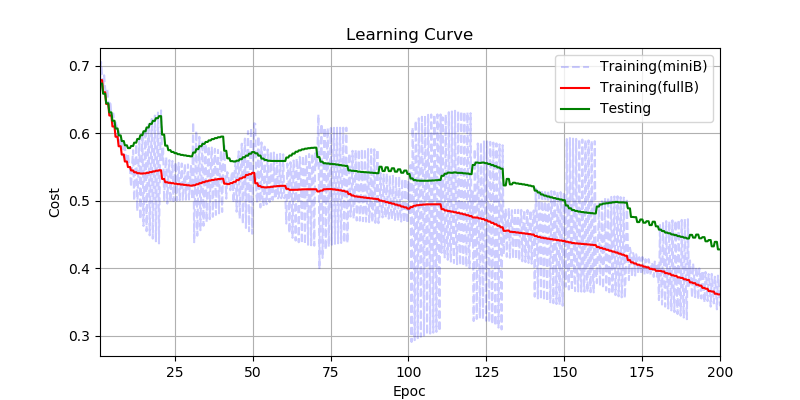

<IPython.core.display.Javascript object>


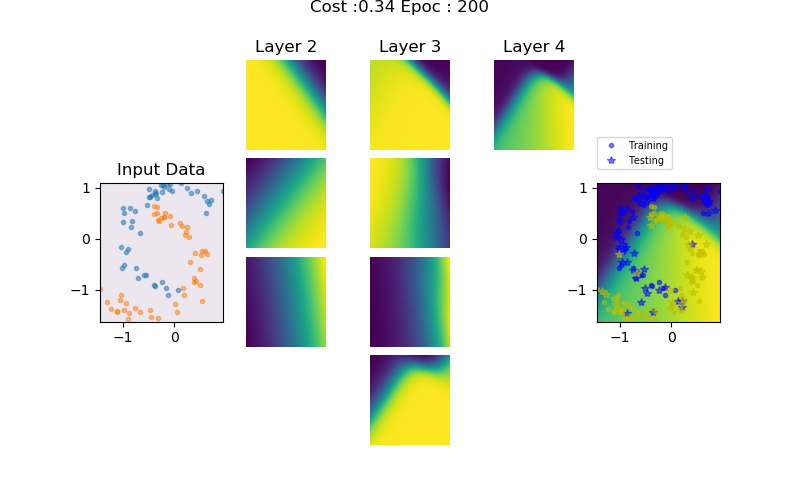

Epoc @ 20 : Training Cost 5.451194e-01  Testing Cost 6.252184e-01
Epoc @ 40 : Training Cost 5.325943e-01  Testing Cost 5.949402e-01
Epoc @ 60 : Training Cost 5.221049e-01  Testing Cost 5.588211e-01
Epoc @ 80 : Training Cost 5.134952e-01  Testing Cost 5.515395e-01
Epoc @ 100 : Training Cost 4.883630e-01  Testing Cost 5.397175e-01
Epoc @ 120 : Training Cost 4.773322e-01  Testing Cost 5.394530e-01
Epoc @ 140 : Training Cost 4.499698e-01  Testing Cost 5.214815e-01
Epoc @ 160 : Training Cost 4.343921e-01  Testing Cost 4.811901e-01
Epoc @ 180 : Training Cost 3.963799e-01  Testing Cost 4.621540e-01
Epoc @ 200 : Training Cost 3.614711e-01  Testing Cost 4.280268e-01
-------------Info---------------
#Classes   :  2
#Features  :  2
#Examples  :  100
Network    :  [2, 3, 4, 1]
ActiFun    :  ['tanh', 'tanh', 'sig']
keepProb   :  [1.0, 1.0, 1.0, 1.0]
Alpha      :  0.01
B1, B2     :  0.9 0.99
lambd      :  0
AdamOpt    :  True
---------------------------
Training Accuracy :: 85.0
Testing  Accuracy ::

In [34]:
fig1=plt.figure(1,figsize=(8,4))
fig2=plt.figure(2,figsize=(8,5))

for i in range(20):         ## 20 times
    NN.fit(itr=10)          ## itr=10 iteretion each time
    NN.PlotLCurve(pause=0)
    fig1.canvas.draw()
    NN.PlotBoundries(Layers=True,pause=0)
    fig2.canvas.draw()
    
NN.PlotLCurve()
NN.PlotBoundries(Layers=True)

print(NN)

yri,yrp = NN.predict(Xr)
ysi,ysp = NN.predict(Xs)

print('Training Accuracy ::',100*np.sum(yri==yr)/yri.shape[1])
print('Testing  Accuracy ::',100*np.sum(ysi==ys)/ysi.shape[1])

In [35]:
plt.close(fig1)
plt.close(fig2)

### Example 2 (Sinusoidal, 2 classes)

**Data**

In [7]:
dtype = ['MOONS','GAUSSIANS','LINEAR','SINUSOIDAL','SPIRAL']

#Training: N=200 examples and no noise
Xr, yr,_ = ds.create_dataset(200, dtype[3],0.0,varargin = 'PRESET');

#Testing: N=200 examples and 10% noise
Xs, ys,_ = ds.create_dataset(200, dtype[3],0.1,varargin = 'PRESET');

print(Xr.shape, yr.shape,Xs.shape, ys.shape)
print('#Features: ',Xr.shape[0])
print('#Examples: ',Xr.shape[1])

(2, 200) (1, 200) (2, 200) (1, 200)
#Features:  2
#Examples:  200


**Neural Network**  :: Hidden Layers : [8,8,5]

In [8]:
NN = deepNet(X=Xr,y=yr,Xts=Xs, yts=ys, Net = [8,8,5],NetAf =['tanh'], alpha=0.01,
             miniBatchSize = 0.3, printCostAt =100, AdamOpt=True,lambd=0,keepProb =[1.0])

#Classes   :  2
#Features  :  2
#Examples  :  200
Network    :  [2, 8, 8, 5, 1]
ActiFun    :  ['tanh', 'tanh', 'tanh', 'sig']
keepProb   :  [1.0, 1.0, 1.0, 1.0, 1.0]


**Training and plotting**

In [10]:
%matplotlib notebook

<IPython.core.display.Javascript object>


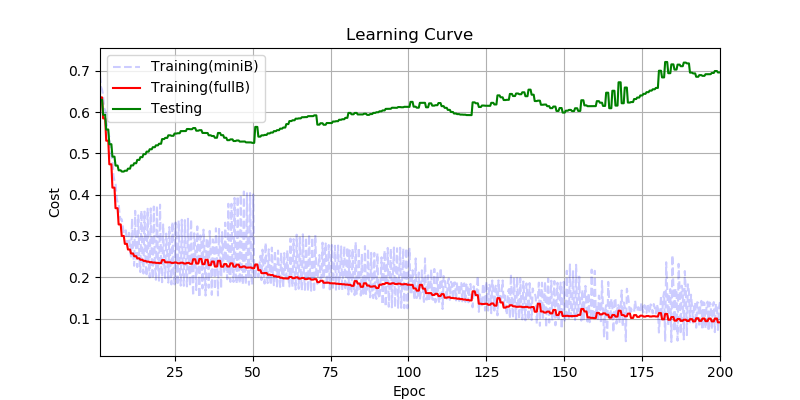

<IPython.core.display.Javascript object>


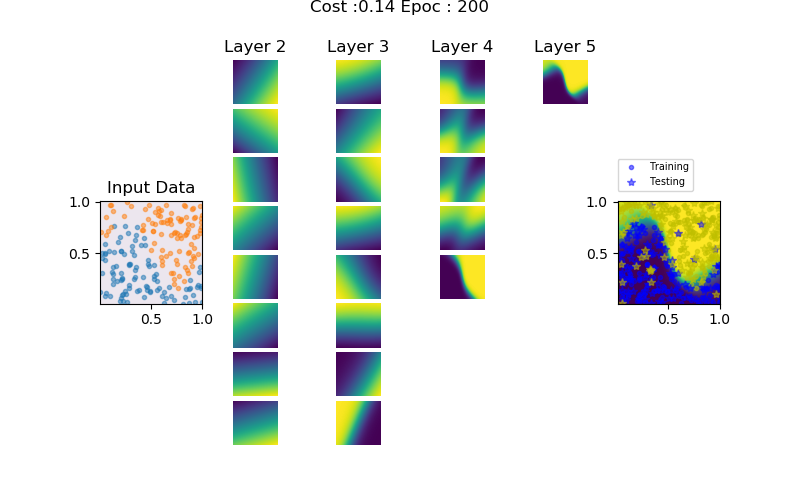

Epoc @ 100 : Training Cost 1.819583e-01  Testing Cost 6.126728e-01
Epoc @ 200 : Training Cost 9.083479e-02  Testing Cost 6.960079e-01
-------------Info---------------
#Classes   :  2
#Features  :  2
#Examples  :  200
Network    :  [2, 8, 8, 5, 1]
ActiFun    :  ['tanh', 'tanh', 'tanh', 'sig']
keepProb   :  [1.0, 1.0, 1.0, 1.0, 1.0]
Alpha      :  0.01
B1, B2     :  0.9 0.99
lambd      :  0
AdamOpt    :  True
---------------------------
Training Accuracy :: 97.0
Testing  Accuracy :: 86.0


In [9]:
plt.close(fig1)
plt.close(fig2)
fig1=plt.figure(1,figsize=(8,4))
fig2=plt.figure(2,figsize=(8,5))

for i in range(20):         ## 20 times
    NN.fit(itr=10)          ## itr=10 iteretion each time
    NN.PlotLCurve(pause=0)
    fig1.canvas.draw()
    NN.PlotBoundries(Layers=True,pause=0)
    fig2.canvas.draw()
    
NN.PlotLCurve()
NN.PlotBoundries(Layers=True)

print(NN)

yri,yrp = NN.predict(Xr)
ysi,ysp = NN.predict(Xs)

print('Training Accuracy ::',100*np.sum(yri==yr)/yri.shape[1])
print('Testing  Accuracy ::',100*np.sum(ysi==ys)/ysi.shape[1])

In [10]:
plt.close(fig1)
plt.close(fig2)

### Example 3 (Gaussian, 4 classes)

**Data** (70-30 split)

In [11]:
X, y = ds.mclassGaus(N=500, nClasses = 4,var =0.25,ShowPlot=False)

[n,N] =X.shape

r  = np.random.permutation(N)

split =int(0.7*N)

Xr = X[:,r[:split]]
yr = y[:,r[:split]]
Xs = X[:,r[split:]]
ys = y[:,r[split:]]

print(Xr.shape, yr.shape,Xs.shape,ys.shape)

print('#Features: ',Xr.shape[0])
print('#Examples: ',Xr.shape[1])

(2, 2000) (1, 2000)
(2, 1400) (1, 1400) (2, 600) (1, 600)
#Features:  2
#Examples:  1400


**Neural Network**  :: Hidden Layers : [8,8,5]

In [12]:
NN = deepNet(X=Xr,y=yr,Xts=Xs, yts=ys, Net = [8,8,5],NetAf =['tanh'], alpha=0.01,
             miniBatchSize = 0.3,printCostAt =-1,AdamOpt=True,lambd=0,keepProb =[1.0])

1 1400 4
1 600 4
#Classes   :  4
#Features  :  2
#Examples  :  1400
Network    :  [2, 8, 8, 5, 4]
ActiFun    :  ['tanh', 'tanh', 'tanh', 'softmax']
keepProb   :  [1.0, 1.0, 1.0, 1.0, 1.0]


<IPython.core.display.Javascript object>


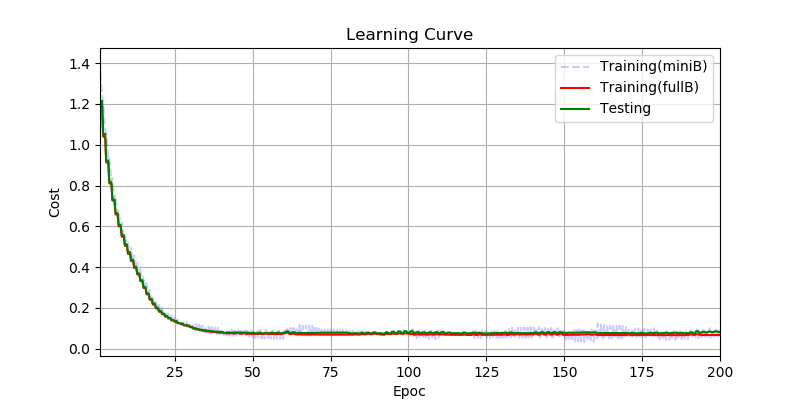

<IPython.core.display.Javascript object>


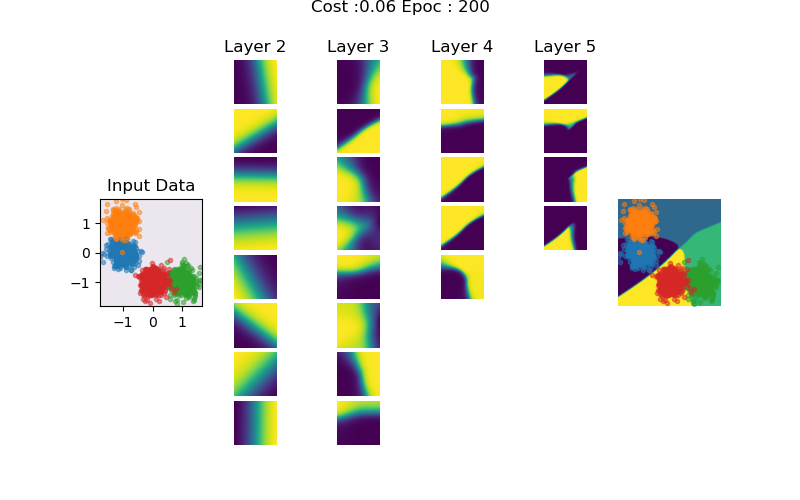

-------------Info---------------
#Classes   :  4
#Features  :  2
#Examples  :  1400
Network    :  [2, 8, 8, 5, 4]
ActiFun    :  ['tanh', 'tanh', 'tanh', 'softmax']
keepProb   :  [1.0, 1.0, 1.0, 1.0, 1.0]
Alpha      :  0.01
B1, B2     :  0.9 0.99
lambd      :  0
AdamOpt    :  True
---------------------------
Training Accuracy :: 97.07142857142857
Testing  Accuracy :: 97.66666666666667


In [13]:
plt.close(fig1)
plt.close(fig2)
fig1=plt.figure(1,figsize=(8,4))
fig2=plt.figure(2,figsize=(8,5))

for i in range(20):         ## 20 times
    NN.fit(itr=10)          ## itr=10 iteretion each time
    NN.PlotLCurve(pause=0)
    fig1.canvas.draw()
    NN.PlotBoundries(Layers=True,pause=0)
    fig2.canvas.draw()
    
NN.PlotLCurve()
NN.PlotBoundries(Layers=True)

print(NN)

yri,yrp = NN.predict(Xr)
ysi,ysp = NN.predict(Xs)

print('Training Accuracy ::',100*np.sum(yri==yr)/yri.shape[1])
print('Testing  Accuracy ::',100*np.sum(ysi==ys)/ysi.shape[1])

In [14]:
plt.close(fig1)
plt.close(fig2)

### Reapeating example 3 with Relu activation

(2, 1400) (1, 1400) (2, 600) (1, 600)
#Features:  2
#Examples:  1400
1 1400 4
1 600 4
#Classes   :  4
#Features  :  2
#Examples  :  1400
Network    :  [2, 8, 8, 5, 4]
ActiFun    :  ['relu', 'relu', 'relu', 'softmax']
keepProb   :  [1.0, 1.0, 1.0, 1.0, 1.0]


<IPython.core.display.Javascript object>


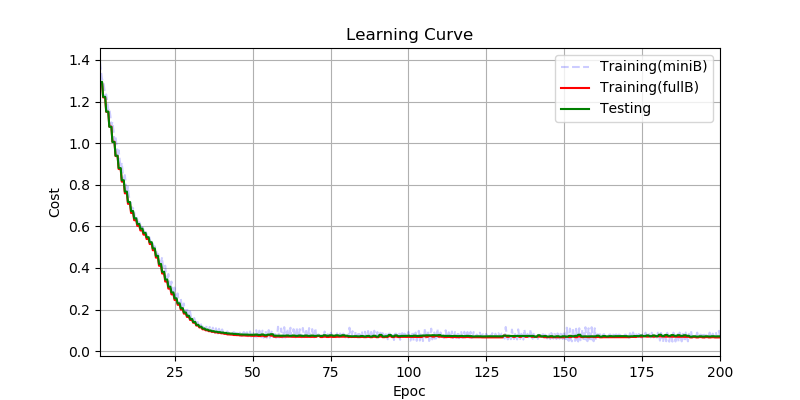

<IPython.core.display.Javascript object>


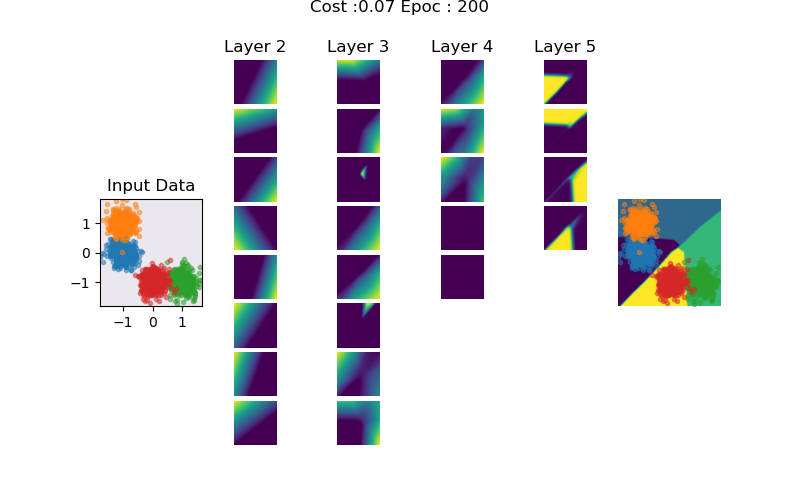

-------------Info---------------
#Classes   :  4
#Features  :  2
#Examples  :  1400
Network    :  [2, 8, 8, 5, 4]
ActiFun    :  ['relu', 'relu', 'relu', 'softmax']
keepProb   :  [1.0, 1.0, 1.0, 1.0, 1.0]
Alpha      :  0.01
B1, B2     :  0.9 0.99
lambd      :  0
AdamOpt    :  True
---------------------------
Training Accuracy :: 97.42857142857143
Testing  Accuracy :: 97.5


In [15]:
print(Xr.shape, yr.shape,Xs.shape,ys.shape)

print('#Features: ',Xr.shape[0])
print('#Examples: ',Xr.shape[1])

NN = deepNet(X=Xr,y=yr,Xts=Xs, yts=ys, Net = [8,8,5],NetAf =['relu'], alpha=0.01,
             miniBatchSize = 0.3,printCostAt =-1,AdamOpt=True,lambd=0,keepProb =[1.0])



plt.close(fig1)
plt.close(fig2)
fig1=plt.figure(1,figsize=(8,4))
fig2=plt.figure(2,figsize=(8,5))

for i in range(20):         ## 20 times
    NN.fit(itr=10)          ## itr=10 iteretion each time
    NN.PlotLCurve(pause=0)
    fig1.canvas.draw()
    NN.PlotBoundries(Layers=True,pause=0)
    fig2.canvas.draw()
    
NN.PlotLCurve()
NN.PlotBoundries(Layers=True)

print(NN)

yri,yrp = NN.predict(Xr)
ysi,ysp = NN.predict(Xs)

print('Training Accuracy ::',100*np.sum(yri==yr)/yri.shape[1])
print('Testing  Accuracy ::',100*np.sum(ysi==ys)/ysi.shape[1])

In [16]:
plt.close(fig1)
plt.close(fig2)

## Real world Examples

### MNIST Dataset (10 classes)

In [36]:
Xy= datasets.load_digits()
X = Xy['data']
y = Xy['target']
print(X.shape, y.shape)

(1797, 64) (1797,)


<IPython.core.display.Javascript object>


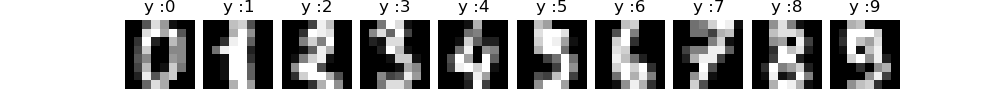

In [37]:
fig=plt.figure(1,figsize=(10,1))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(X[i].reshape([8,8]),cmap='gray',aspect='auto')
    plt.title('y :' + str(y[i]))
    plt.axis('off')
plt.subplots_adjust(top=0.8,wspace=0.12, hspace=0)
plt.show()

In [38]:
plt.close(fig)

In [20]:
N =X.shape[0] # total examples

r  = np.random.permutation(N)
split=int(0.7*N)

Xr = X[r[:split],:].T
yr = y[r[:split]][None,:]
Xs = X[r[split:],:].T
ys = y[r[split:]][None,:]
print(Xr.shape, yr.shape, Xs.shape, ys.shape)
print('#Features: ',Xr.shape[0])
print('#Examples: ',Xr.shape[1])

(64, 1257) (1, 1257) (64, 540) (1, 540)
#Features:  64
#Examples:  1257


In [21]:
NN = deepNet(X = Xr,y=yr,Xts=Xs, yts=ys, Net = [8,8,5],NetAf =['relu'], alpha=0.01,
             miniBatchSize = 0.3, printCostAt =10,AdamOpt=True,lambd=0,keepProb =[1.0])

1 1257 10
1 540 10
#Classes   :  10
#Features  :  64
#Examples  :  1257
Network    :  [64, 8, 8, 5, 10]
ActiFun    :  ['relu', 'relu', 'relu', 'softmax']
keepProb   :  [1.0, 1.0, 1.0, 1.0, 1.0]


<IPython.core.display.Javascript object>


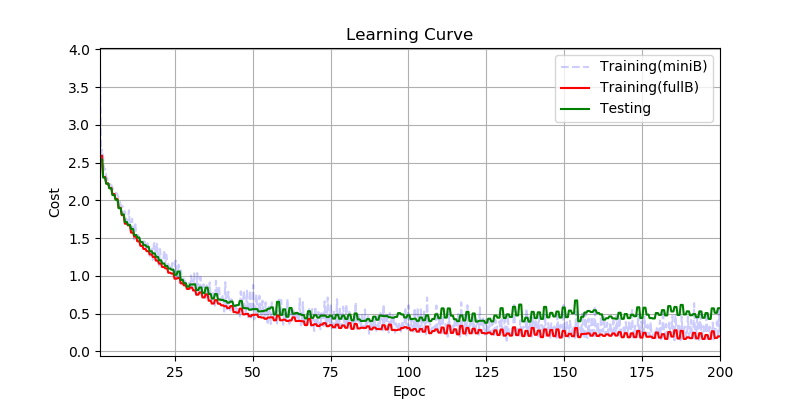

Epoc @ 10 : Training Cost 1.669677e+00  Testing Cost 1.676300e+00
Epoc @ 20 : Training Cost 1.163774e+00  Testing Cost 1.207048e+00
Epoc @ 30 : Training Cost 8.466815e-01  Testing Cost 8.878032e-01
Epoc @ 40 : Training Cost 6.114897e-01  Testing Cost 6.825550e-01
Epoc @ 50 : Training Cost 4.852754e-01  Testing Cost 5.607571e-01
Epoc @ 60 : Training Cost 4.209391e-01  Testing Cost 5.582497e-01
Epoc @ 70 : Training Cost 3.606742e-01  Testing Cost 4.806711e-01
Epoc @ 80 : Training Cost 3.139481e-01  Testing Cost 4.311313e-01
Epoc @ 90 : Training Cost 2.980853e-01  Testing Cost 4.202055e-01
Epoc @ 100 : Training Cost 3.096001e-01  Testing Cost 4.799720e-01
Epoc @ 110 : Training Cost 2.499592e-01  Testing Cost 4.405643e-01
Epoc @ 120 : Training Cost 2.412105e-01  Testing Cost 4.029100e-01
Epoc @ 130 : Training Cost 2.904016e-01  Testing Cost 5.736184e-01
Epoc @ 140 : Training Cost 3.113402e-01  Testing Cost 5.247168e-01
Epoc @ 150 : Training Cost 2.727288e-01  Testing Cost 5.830139e-01
Epoc

In [22]:
plt.close(fig)
fig=plt.figure(1,figsize=(8,4))

for i in range(100):
    NN.fit(itr=2)
    NN.PlotLCurve(pause=0)
    fig.canvas.draw()
    
NN.PlotLCurve()

print(NN)

yri,yrp = NN.predict(Xr)
ysi,ysp = NN.predict(Xs)

print('Training Accuracy ::',100*np.sum(yri==yr)/yri.shape[1])
print('Testing  Accuracy ::',100*np.sum(ysi==ys)/ysi.shape[1])

In [23]:
plt.close(fig)

### Breast Cancer dataset (2 classes)

In [24]:
Xy = datasets.load_breast_cancer()
X = Xy['data']
y = Xy['target']
print(X.shape, y.shape)

(569, 30) (569,)


In [25]:
N =X.shape[0] # total examples

r  = np.random.permutation(N)
split=int(0.7*N)

Xr = X[r[:split],:].T
yr = y[r[:split]][None,:]
Xs = X[r[split:],:].T
ys = y[r[split:]][None,:]
print(Xr.shape, yr.shape, Xs.shape, ys.shape)
print('#Features: ',Xr.shape[0])
print('#Examples: ',Xr.shape[1])

(30, 398) (1, 398) (30, 171) (1, 171)
#Features:  30
#Examples:  398


**Normalizing Data**

In [26]:
mn = np.mean(Xr,axis=1)[:,None]
sd = np.std(Xr,axis=1)[:,None]
Xrn=(Xr-mn)/sd
Xsn=(Xs-mn)/sd

print(Xrn.shape, yr.shape, Xsn.shape, ys.shape)

(30, 398) (1, 398) (30, 171) (1, 171)


In [27]:
NN = deepNet(X = Xrn,y=yr,Xts=Xsn, yts=ys, Net = [8,8,5],NetAf =['relu'], alpha=0.01,
             miniBatchSize = 0.3, printCostAt =10,AdamOpt=True,lambd=0,keepProb =[1.0])

#Classes   :  2
#Features  :  30
#Examples  :  398
Network    :  [30, 8, 8, 5, 1]
ActiFun    :  ['relu', 'relu', 'relu', 'sig']
keepProb   :  [1.0, 1.0, 1.0, 1.0, 1.0]


<IPython.core.display.Javascript object>


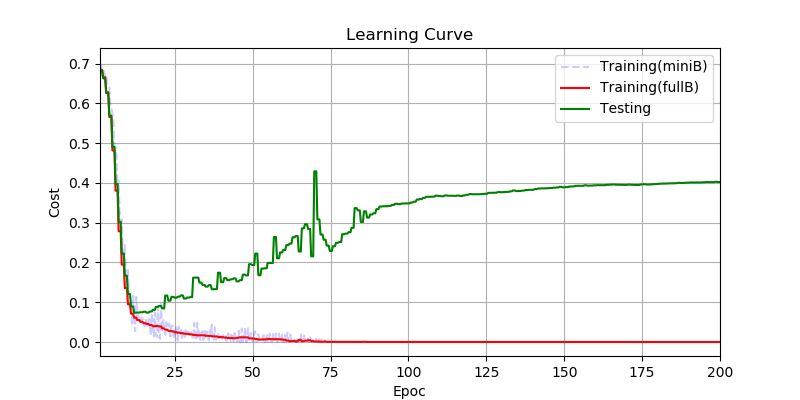

Epoc @ 10 : Training Cost 9.471268e-02  Testing Cost 1.207643e-01
Epoc @ 20 : Training Cost 3.918440e-02  Testing Cost 9.051653e-02
Epoc @ 30 : Training Cost 1.906984e-02  Testing Cost 1.128862e-01
Epoc @ 40 : Training Cost 1.213079e-02  Testing Cost 1.504232e-01
Epoc @ 50 : Training Cost 8.890949e-03  Testing Cost 1.936689e-01
Epoc @ 60 : Training Cost 5.657525e-03  Testing Cost 2.314398e-01
Epoc @ 70 : Training Cost 1.394953e-03  Testing Cost 4.292456e-01
Epoc @ 80 : Training Cost 1.233529e-04  Testing Cost 2.726136e-01
Epoc @ 90 : Training Cost 2.483784e-05  Testing Cost 3.341603e-01
Epoc @ 100 : Training Cost 1.304866e-05  Testing Cost 3.485662e-01
Epoc @ 110 : Training Cost 8.223927e-06  Testing Cost 3.671845e-01
Epoc @ 120 : Training Cost 6.269460e-06  Testing Cost 3.721386e-01
Epoc @ 130 : Training Cost 5.191484e-06  Testing Cost 3.768768e-01
Epoc @ 140 : Training Cost 4.285282e-06  Testing Cost 3.828834e-01
Epoc @ 150 : Training Cost 3.736508e-06  Testing Cost 3.891559e-01
Epoc

In [28]:
plt.close(fig)
fig=plt.figure(1,figsize=(8,4))

for i in range(100):
    NN.fit(itr=2)
    NN.PlotLCurve(pause=0)
    fig.canvas.draw()
    
NN.PlotLCurve()

print(NN)

yri,yrp = NN.predict(Xrn)
ysi,ysp = NN.predict(Xsn)

print('Training Accuracy ::',100*np.sum(yri==yr)/yri.shape[1])
print('Testing  Accuracy ::',100*np.sum(ysi==ys)/ysi.shape[1])

In [29]:
plt.close(fig)

<span style="color:blue">**Nikesh Bajaj**</span>
$$.$$
<span style="color:green">
Email:\\
n.bajaj@qmul.ac.uk \\
bajaj.nikkey@gmail.com \\
http://nikeshbajaj.in \\
</span>